In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load your dataset (if not already loaded)
df = pd.read_csv(r"C:\rock\Data Science\Fenny\Indian automoble buying behavour study 1.0.csv")

In [4]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
# Step 1: Feature Engineering (add any derived features)
df['Combined Loan'] = df.apply(lambda row: 1 if row['Personal loan'] == 'Yes' or row['House Loan'] == 'Yes' else 0, axis=1)
df['Car Affordability Ratio'] = df['Price'] / df['Total Salary']

In [7]:
# Step 2: Select relevant features
features = ['Age', 'No of Dependents', 'Total Salary', 'Price', 'Combined Loan', 'Car Affordability Ratio']
X = df[features]


In [8]:
df.isna().sum()

Age                        0
Profession                 0
Marrital Status            0
Education                  0
No of Dependents           0
Personal loan              0
House Loan                 0
Wife Working               0
Salary                     0
Wife Salary                0
Total Salary               0
Make                       0
Price                      0
Combined Loan              0
Car Affordability Ratio    0
dtype: int64

In [9]:
# Step 3: Handle Missing Values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [10]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

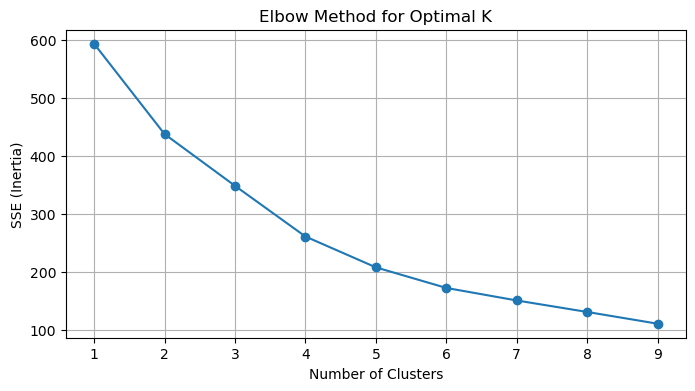

In [11]:
# Step 5: Determine Optimal K using Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


In [12]:
#  Step 6: Final Clustering and Assign Labels

In [13]:
# Fit final model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Preview clustered data
df[['Age', 'Total Salary', 'Price', 'Cluster']].head()


,Age,Total Salary,Price,Cluster
0,27,800000,800000,0
1,35,2000000,1000000,0
2,45,1800000,1200000,1
3,41,2200000,1200000,1
4,31,2600000,1600000,1


In [14]:
#  Step 7: Analyze the Clusters

In [15]:
# Cluster summary
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Total Salary': 'mean',
    'Price': 'mean',
    'Car Affordability Ratio': 'mean',
    'Combined Loan': 'sum'
}).reset_index()

print(cluster_summary)


   Cluster        Age  Total Salary         Price  Car Affordability Ratio  \
0        0  32.339623  1.596226e+06  9.605660e+05                 0.629400   
1        1  41.000000  3.111111e+06  1.471111e+06                 0.491451   
2        2  36.000000  2.000000e+05  1.100000e+06                 5.500000   

   Combined Loan  
0             21  
1             24  
2              0  


In [16]:
# Step 8: Visualize Clusters

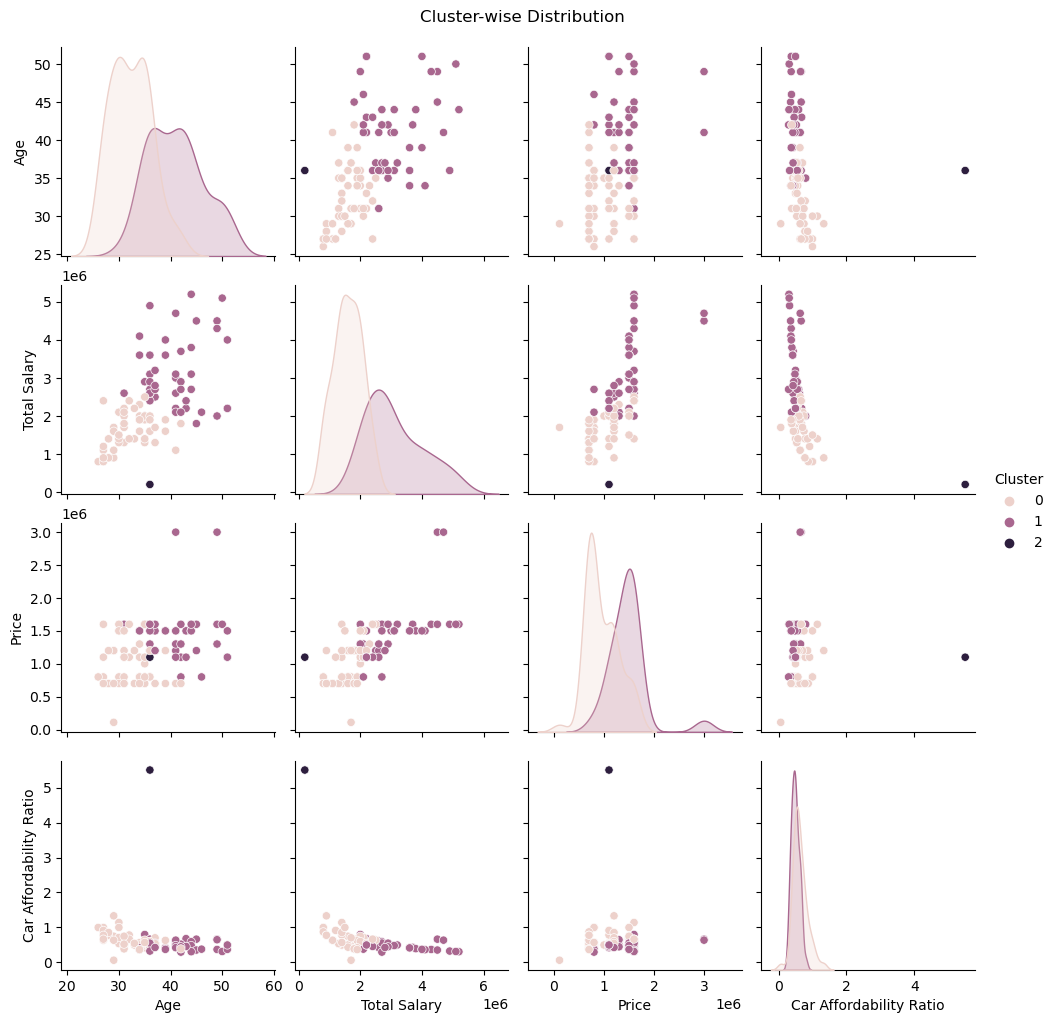

In [17]:
# Visualize clusters using 2D PCA or just a pairplot
sns.pairplot(df, hue='Cluster', vars=['Age', 'Total Salary', 'Price', 'Car Affordability Ratio'])
plt.suptitle("Cluster-wise Distribution", y=1.02)
plt.show()
